# Competitive fitness analysis

**Housekeeping**

In [1]:
library(akima)
library(car)
library(ComplexHeatmap)
library(MASS)
library(nlme)
library(reshape2)
library(scales)
library(tidyverse)
library(vegan)
library(viridis)

Loading required package: carData
Loading required package: grid
ComplexHeatmap version 1.20.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.1.1       ✔ forcats 0.3.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ dplyr::collapse()   masks nlme::collapse()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ d

**Read in data**

In [2]:
species_composition = read.table("../../../data/amplicon/rel_abund.txt", 
                                 sep = "\t",
                                 header = T,
                                 row.names = 1)

metadata = read.table("../../../data/amplicon/meta.txt",
                      sep = "\t",
                      header = T,
                      row.names = 1)

# inspect

head(species_composition)
head(metadata)

,Citrobacter_koseri_HAMBI_1287,Elizabethkingia_meningoseptica_HAMBI_1875,Aeromonas_caviae_HAMBI_1972,Pseudomonas_chlororaphis_HAMBI_1977,Sphingobacterium_spiritivorum_HAMBI_1896,Comamonas_testosteroni_HAMBI_403,Agrobacterium_tumefaciens_HAMBI_105,Stenotrophomonas_maltophilia_HAMBI_2659,Myroides_odoratus_HAMBI_1923,Morganella_morganii_HAMBI_1292,⋯,Roseomonas_gilardii_HAMBI_2470,Cupriavidus_necator_HAMBI_2164,Escherichia_coli_JE2571.RP4.,Paraburkholderia_caryophylli_HAMBI_2159,Chitinophaga_filiformis_HAMBI_1966,Thermomonas_haemolytica_HAMBI_2467,Moraxella_canis_HAMBI_2792,Acinetobacter_lwoffii_HAMBI_97,Pseudomonas_putida_HAMBI_6,Chitinophaga_sancti_HAMBI_1988
T12_I0_AB0_REP1,0.02044547,0.1950614,0.2713066,0.1746159,0.002609835,0.3269056022,5.283067e-05,0.00000000,0.0000000000,2.113227e-05,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP2,0.18956445,0.3435331,0.1276586,0.3231926,0.003979660,0.0002653106,8.843688e-05,0.00000000,0.0000000000,3.537475e-04,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP3,0.15960167,0.2744808,0.1932894,0.2805813,0.087605975,0.0000000000,0.000000e+00,0.00000000,0.0006279998,0.000000e+00,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP4,0.16116394,0.3383399,0.1873889,0.1478108,0.081355907,0.0047695225,6.591421e-03,0.00000000,0.0109758265,7.924517e-04,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP5,0.17480631,0.2856506,0.2308473,0.1852274,0.017277655,0.0133419144,5.990247e-03,0.04039704,0.0019802470,1.732716e-03,⋯,0,0.0003465432,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP6,0.24414392,0.2605325,0.2364341,0.1691945,0.018537243,0.0043815302,1.365015e-02,0.00000000,0.0129760701,3.875969e-03,⋯,0,0.0000000000,0,0,0,0,0,0,0.0001263903,0


,Immigration,Streptomycin,Replicate,Day
T12_I0_AB0_REP1,0,0,1,48
T12_I0_AB0_REP2,0,0,2,48
T12_I0_AB0_REP3,0,0,3,48
T12_I0_AB0_REP4,0,0,4,48
T12_I0_AB0_REP5,0,0,5,48
T12_I0_AB0_REP6,0,0,6,48


**Add pseudocount to control for noise**

Pseudocount level, corresponding to 1 % relative abundance, selected both to control for noise caused by large relative fluctuations in the abundance of low-abundance species and to stress abundance changes for abundant species.

In [3]:
species_composition = species_composition + 0.01

# inspect

head(species_composition)

# normalize to relative abundance (vectors sum to 1)

species_composition = as.data.frame(decostand(species_composition, method = "total"))
head(species_composition)

# check

head(rowSums(species_composition)) # ok

,Citrobacter_koseri_HAMBI_1287,Elizabethkingia_meningoseptica_HAMBI_1875,Aeromonas_caviae_HAMBI_1972,Pseudomonas_chlororaphis_HAMBI_1977,Sphingobacterium_spiritivorum_HAMBI_1896,Comamonas_testosteroni_HAMBI_403,Agrobacterium_tumefaciens_HAMBI_105,Stenotrophomonas_maltophilia_HAMBI_2659,Myroides_odoratus_HAMBI_1923,Morganella_morganii_HAMBI_1292,⋯,Roseomonas_gilardii_HAMBI_2470,Cupriavidus_necator_HAMBI_2164,Escherichia_coli_JE2571.RP4.,Paraburkholderia_caryophylli_HAMBI_2159,Chitinophaga_filiformis_HAMBI_1966,Thermomonas_haemolytica_HAMBI_2467,Moraxella_canis_HAMBI_2792,Acinetobacter_lwoffii_HAMBI_97,Pseudomonas_putida_HAMBI_6,Chitinophaga_sancti_HAMBI_1988
T12_I0_AB0_REP1,0.03044547,0.2050614,0.2813066,0.1846159,0.01260983,0.33690560,0.01005283,0.01000000,0.01000000,0.01002113,⋯,0.01,0.01000000,0.01,0.01,0.01,0.01,0.01,0.01,0.01000000,0.01
T12_I0_AB0_REP2,0.19956445,0.3535331,0.1376586,0.3331926,0.01397966,0.01026531,0.01008844,0.01000000,0.01000000,0.01035375,⋯,0.01,0.01000000,0.01,0.01,0.01,0.01,0.01,0.01,0.01000000,0.01
T12_I0_AB0_REP3,0.16960167,0.2844808,0.2032894,0.2905813,0.09760597,0.01000000,0.01000000,0.01000000,0.01062800,0.01000000,⋯,0.01,0.01000000,0.01,0.01,0.01,0.01,0.01,0.01,0.01000000,0.01
T12_I0_AB0_REP4,0.17116394,0.3483399,0.1973889,0.1578108,0.09135591,0.01476952,0.01659142,0.01000000,0.02097583,0.01079245,⋯,0.01,0.01000000,0.01,0.01,0.01,0.01,0.01,0.01,0.01000000,0.01
T12_I0_AB0_REP5,0.18480631,0.2956506,0.2408473,0.1952274,0.02727766,0.02334191,0.01599025,0.05039704,0.01198025,0.01173272,⋯,0.01,0.01034654,0.01,0.01,0.01,0.01,0.01,0.01,0.01000000,0.01
T12_I0_AB0_REP6,0.25414392,0.2705325,0.2464341,0.1791945,0.02853724,0.01438153,0.02365015,0.01000000,0.02297607,0.01387597,⋯,0.01,0.01000000,0.01,0.01,0.01,0.01,0.01,0.01,0.01012639,0.01


,Citrobacter_koseri_HAMBI_1287,Elizabethkingia_meningoseptica_HAMBI_1875,Aeromonas_caviae_HAMBI_1972,Pseudomonas_chlororaphis_HAMBI_1977,Sphingobacterium_spiritivorum_HAMBI_1896,Comamonas_testosteroni_HAMBI_403,Agrobacterium_tumefaciens_HAMBI_105,Stenotrophomonas_maltophilia_HAMBI_2659,Myroides_odoratus_HAMBI_1923,Morganella_morganii_HAMBI_1292,⋯,Roseomonas_gilardii_HAMBI_2470,Cupriavidus_necator_HAMBI_2164,Escherichia_coli_JE2571.RP4.,Paraburkholderia_caryophylli_HAMBI_2159,Chitinophaga_filiformis_HAMBI_1966,Thermomonas_haemolytica_HAMBI_2467,Moraxella_canis_HAMBI_2792,Acinetobacter_lwoffii_HAMBI_97,Pseudomonas_putida_HAMBI_6,Chitinophaga_sancti_HAMBI_1988
T12_I0_AB0_REP1,0.02360114,0.1589623,0.2180671,0.1431131,0.009775066,0.261167133,0.007792892,0.007751938,0.007751938,0.007768320,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938
T12_I0_AB0_REP2,0.15470112,0.2740566,0.1067121,0.2582888,0.010836945,0.007957605,0.007820494,0.007751938,0.007751938,0.008026161,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938
T12_I0_AB0_REP3,0.13147416,0.2205277,0.1575887,0.2252569,0.075663546,0.007751938,0.007751938,0.007751938,0.008238760,0.007751938,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938
T12_I0_AB0_REP4,0.13268523,0.2700309,0.1530147,0.1223339,0.070818533,0.011449242,0.012861566,0.007751938,0.016260331,0.008366242,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938
T12_I0_AB0_REP5,0.14326070,0.2291865,0.1867033,0.1513390,0.021145469,0.018094507,0.012395541,0.039067473,0.009287013,0.009095129,⋯,0.007751938,0.008020576,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938
T12_I0_AB0_REP6,0.19701079,0.2097151,0.1910342,0.1389104,0.022121894,0.011148473,0.018333451,0.007751938,0.017810907,0.010756565,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007849915,0.007751938


T12_I0_AB0_REP1 T12_I0_AB0_REP2 T12_I0_AB0_REP3 T12_I0_AB0_REP4 T12_I0_AB0_REP5 
              1               1               1               1               1 
T12_I0_AB0_REP6 
              1

**Merge species composition with metadata**

In [4]:
species_composition$SAMPLE = rownames(species_composition)
metadata$SAMPLE = rownames(metadata)

df = merge(species_composition, metadata, all = T)

# inspect

head(df)

SAMPLE,Citrobacter_koseri_HAMBI_1287,Elizabethkingia_meningoseptica_HAMBI_1875,Aeromonas_caviae_HAMBI_1972,Pseudomonas_chlororaphis_HAMBI_1977,Sphingobacterium_spiritivorum_HAMBI_1896,Comamonas_testosteroni_HAMBI_403,Agrobacterium_tumefaciens_HAMBI_105,Stenotrophomonas_maltophilia_HAMBI_2659,Myroides_odoratus_HAMBI_1923,⋯,Chitinophaga_filiformis_HAMBI_1966,Thermomonas_haemolytica_HAMBI_2467,Moraxella_canis_HAMBI_2792,Acinetobacter_lwoffii_HAMBI_97,Pseudomonas_putida_HAMBI_6,Chitinophaga_sancti_HAMBI_1988,Immigration,Streptomycin,Replicate,Day
T12_I0_AB0_REP1,0.02360114,0.1589623,0.2180671,0.1431131,0.009775066,0.261167133,0.007792892,0.007751938,0.007751938,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0,0,1,48
T12_I0_AB0_REP2,0.15470112,0.2740566,0.1067121,0.2582888,0.010836945,0.007957605,0.007820494,0.007751938,0.007751938,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0,0,2,48
T12_I0_AB0_REP3,0.13147416,0.2205277,0.1575887,0.2252569,0.075663546,0.007751938,0.007751938,0.007751938,0.008238760,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0,0,3,48
T12_I0_AB0_REP4,0.13268523,0.2700309,0.1530147,0.1223339,0.070818533,0.011449242,0.012861566,0.007751938,0.016260331,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0,0,4,48
T12_I0_AB0_REP5,0.14326070,0.2291865,0.1867033,0.1513390,0.021145469,0.018094507,0.012395541,0.039067473,0.009287013,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0.007751938,0,0,5,48
T12_I0_AB0_REP6,0.19701079,0.2097151,0.1910342,0.1389104,0.022121894,0.011148473,0.018333451,0.007751938,0.017810907,⋯,0.007751938,0.007751938,0.007751938,0.007751938,0.007849915,0.007751938,0,0,6,48


**Convert to long table format by time point**

In [5]:
df = melt(df[,-1], id.vars = c("Replicate", "Streptomycin", "Immigration", "Day"))
colnames(df) = c("Replicate", "Streptomycin", "Immigration", "Day", "Species", "Abundance")
df = spread(df, Day, Abundance)
colnames(df) = c("Replicate", "Streptomycin", "Immigration", "Species", "ABUND16", "ABUND32", "ABUND48")
df$ID = paste(df$Streptomycin, df$Immigration, df$Replicate, sep = "_")

# inspect

head(df)

Replicate,Streptomycin,Immigration,Species,ABUND16,ABUND32,ABUND48,ID
1,0,0,Citrobacter_koseri_HAMBI_1287,0.144363960,0.060908084,0.023601138,0_0_1
1,0,0,Elizabethkingia_meningoseptica_HAMBI_1875,0.182488245,0.326688815,0.158962317,0_0_1
1,0,0,Aeromonas_caviae_HAMBI_1972,0.172957174,0.140642303,0.218067138,0_0_1
1,0,0,Pseudomonas_chlororaphis_HAMBI_1977,0.182488245,0.162790698,0.143113117,0_0_1
1,0,0,Sphingobacterium_spiritivorum_HAMBI_1896,0.023637057,0.025470653,0.009775066,0_0_1
1,0,0,Comamonas_testosteroni_HAMBI_403,0.007751938,0.007751938,0.261167133,0_0_1


**Compute selection coefficients leveraged against initial population size**

In [6]:
selcoef1 = df
selcoef1$selcoef = log(selcoef1$ABUND32/selcoef1$ABUND16)
selcoef1$Interval = "pulse"

selcoef2 = df
selcoef2$selcoef = log(selcoef2$ABUND48/selcoef2$ABUND32)
selcoef2$Interval = "recovery"

df = rbind(selcoef1, selcoef2)

# inspect

head(df)

Replicate,Streptomycin,Immigration,Species,ABUND16,ABUND32,ABUND48,ID,selcoef,Interval
1,0,0,Citrobacter_koseri_HAMBI_1287,0.144363960,0.060908084,0.023601138,0_0_1,-8.629717e-01,pulse
1,0,0,Elizabethkingia_meningoseptica_HAMBI_1875,0.182488245,0.326688815,0.158962317,0_0_1,5.823223e-01,pulse
1,0,0,Aeromonas_caviae_HAMBI_1972,0.172957174,0.140642303,0.218067138,0_0_1,-2.068242e-01,pulse
1,0,0,Pseudomonas_chlororaphis_HAMBI_1977,0.182488245,0.162790698,0.143113117,0_0_1,-1.142204e-01,pulse
1,0,0,Sphingobacterium_spiritivorum_HAMBI_1896,0.023637057,0.025470653,0.009775066,0_0_1,7.471126e-02,pulse
1,0,0,Comamonas_testosteroni_HAMBI_403,0.007751938,0.007751938,0.261167133,0_0_1,1.332268e-15,pulse


**Merge with phenotypic trait information**

In [7]:
phenotypes = read.table("../../../data/amplicon/phenotypic_traits.txt",
                        sep = "\t",
                        header = T)

phenotypes$Species = rownames(phenotypes)
df$Species = gsub("Escherichia_coli_JE2571.RP4.", "Escherichia_coli_JE2571_RP4", df$Species)
phenotypes = phenotypes[phenotypes$Species %in% unique(df$Species),]
df = merge(df, phenotypes, by = "Species", all = T)

# inspect

head(df)

Species,Replicate,Streptomycin,Immigration,ABUND16,ABUND32,ABUND48,ID,selcoef,Interval,K_growth,r_growth,Streptomycin_MIC,Aminoglycoside_resistance_gene,Carbon_sources
Acinetobacter_lwoffii_HAMBI_97,4,0,0,0.007751938,0.007751938,0.007751938,0_0_4,4.440892e-16,recovery,0.1983135,0.3693021,-1.660731,0,8
Acinetobacter_lwoffii_HAMBI_97,4,16,1,0.007751938,0.007751938,0.007751938,16_1_4,-6.661338e-16,pulse,0.1983135,0.3693021,-1.660731,0,8
Acinetobacter_lwoffii_HAMBI_97,8,4,1,0.007751938,0.007751938,0.007751938,4_1_8,2.220446e-16,recovery,0.1983135,0.3693021,-1.660731,0,8
Acinetobacter_lwoffii_HAMBI_97,4,16,0,0.007751938,0.007751938,0.007751938,16_0_4,6.661338e-16,pulse,0.1983135,0.3693021,-1.660731,0,8
Acinetobacter_lwoffii_HAMBI_97,8,0,1,0.007751938,0.007751938,0.007751938,0_1_8,2.220446e-16,recovery,0.1983135,0.3693021,-1.660731,0,8
Acinetobacter_lwoffii_HAMBI_97,2,16,1,0.007751938,0.007751938,0.007751938,16_1_2,-8.881784e-16,recovery,0.1983135,0.3693021,-1.660731,0,8


In [8]:
unique(df$Species)

[1] "Acinetobacter_lwoffii_HAMBI_97"           
 [2] "Aeromonas_caviae_HAMBI_1972"              
 [3] "Agrobacterium_tumefaciens_HAMBI_105"      
 [4] "Azorhizobium_caulinodans_HAMBI_216"       
 [5] "Azospirillum_brasilense_HAMBI_3172"       
 [6] "Bordetella_avium_HAMBI_2160"              
 [7] "Chitinophaga_filiformis_HAMBI_1966"       
 [8] "Chitinophaga_sancti_HAMBI_1988"           
 [9] "Citrobacter_koseri_HAMBI_1287"            
[10] "Comamonas_testosteroni_HAMBI_403"         
[11] "Cupriavidus_necator_HAMBI_2164"           
[12] "Elizabethkingia_meningoseptica_HAMBI_1875"
[13] "Escherichia_coli_JE2571_RP4"              
[14] "Hafnia_alvei_HAMBI_1279"                  
[15] "Kluyvera_intermedia_HAMBI_1299"           
[16] "Moraxella_canis_HAMBI_2792"               
[17] "Morganella_morganii_HAMBI_1292"           
[18] "Myroides_odoratus_HAMBI_1923"             
[19] "Niabella_yanshanensis_HAMBI_3031"         
[20] "Paraburkholderia_caryophylli_HAMBI_2159"  
[21] "Paracoccus_denitrificans_HAMBI_2443"      
[22] "Pseudomonas_chlororaphis_HAMBI_1977"      
[23] "Pseudomonas_putida_HAMBI_6"               
[24] "Roseomonas_gilardii_HAMBI_2470"           
[25] "Sphingobacterium_multivorum_HAMBI_1874"   
[26] "Sphingobacterium_spiritivorum_HAMBI_1896" 
[27] "Sphingobium_yanoikuyae_HAMBI_1842"        
[28] "Stenotrophomonas_maltophilia_HAMBI_2659"  
[29] "Thermomonas_haemolytica_HAMBI_2467"

**Normalize by reducing by community one species (Azospirillum brasilense)**

In [9]:
A_brasilense = df[df$Species == "Azospirillum_brasilense_HAMBI_3172",]
A_brasilense = A_brasilense[,c("ID", "Interval", "selcoef")]
colnames(A_brasilense) = c("ID", "Interval", "selcoef_Ab")
head(A_brasilense)
df2 = merge(df, A_brasilense, by = c("ID", "Interval"), all = T)
nrow(df)
nrow(df2)
df2$selcoef_norm = df2$selcoef - df2$selcoef_Ab
df2 = df2[df2$Species != "Azospirillum_brasilense_HAMBI_3172",]
nrow(df2)
head(df2)

,ID,Interval,selcoef_Ab
513,4_0_4,recovery,0.13142680
514,0_1_7,pulse,-0.07195992
515,0_0_7,pulse,0.44423390
516,128_0_4,recovery,-0.98356444
517,16_1_6,pulse,-0.02128927
518,4_1_4,recovery,0.37196162


[1] 3712

[1] 3712

[1] 3584

,ID,Interval,Species,Replicate,Streptomycin,Immigration,ABUND16,ABUND32,ABUND48,selcoef,K_growth,r_growth,Streptomycin_MIC,Aminoglycoside_resistance_gene,Carbon_sources,selcoef_Ab,selcoef_norm
1,0_0_1,pulse,Stenotrophomonas_maltophilia_HAMBI_2659,1,0,0,0.007751938,0.007751938,0.007751938,1.332268e-15,0.08157468,0.8048875,3.8712010,1,6,0.1085117,-0.1085117
3,0_0_1,pulse,Kluyvera_intermedia_HAMBI_1299,1,0,0,0.007751938,0.007751938,0.007751938,1.332268e-15,0.30186461,0.7224100,-0.2876821,1,15,0.1085117,-0.1085117
4,0_0_1,pulse,Azorhizobium_caulinodans_HAMBI_216,1,0,0,0.007751938,0.007751938,0.007751938,1.332268e-15,0.19927934,0.3530889,1.0986123,0,15,0.1085117,-0.1085117
5,0_0_1,pulse,Citrobacter_koseri_HAMBI_1287,1,0,0,0.144363960,0.060908084,0.023601138,-8.629717e-01,0.38774476,0.6190797,3.1780538,1,16,0.1085117,-0.9714834
6,0_0_1,pulse,Escherichia_coli_JE2571_RP4,1,0,0,0.007751938,0.007751938,0.007751938,1.332268e-15,0.24617939,0.8880764,6.9314718,1,3,0.1085117,-0.1085117
7,0_0_1,pulse,Morganella_morganii_HAMBI_1292,1,0,0,0.010928962,0.012181617,0.007768320,1.085117e-01,0.21548247,0.8490240,-1.6607312,1,3,0.1085117,0.0000000


**Statistical analysis**

Antibiotic pulse phase

In [10]:
M_pulse = step(aov(selcoef ~ factor(Streptomycin) * Immigration * Streptomycin_MIC * r_growth, 
                   data = df2[df2$Interval == "pulse",]), trace=0)

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp,factor,interval
factor(Streptomycin),3,16.228937,5.409646,12.243617,6.350554e-08,1.9408563,factor(Streptomycin),pulse
Streptomycin_MIC,1,14.973699,14.973699,33.889877,6.995843e-09,1.7907395,Streptomycin_MIC,pulse
r_growth,1,19.462054,19.462054,44.048343,4.334232e-11,2.3275123,r_growth,pulse
factor(Streptomycin):Streptomycin_MIC,3,5.842308,1.947436,4.407620,4.274868e-03,0.6986952,factor(Streptomycin):Streptomycin_MIC,pulse
factor(Streptomycin):r_growth,3,8.819195,2.939732,6.653476,1.826377e-04,1.0547081,factor(Streptomycin):r_growth,pulse
Streptomycin_MIC:r_growth,1,21.562122,21.562122,48.801412,4.095447e-12,2.5786643,Streptomycin_MIC:r_growth,pulse
factor(Streptomycin):Streptomycin_MIC:r_growth,3,21.143361,7.047787,15.951211,3.172497e-10,2.5285836,factor(Streptomycin):Streptomycin_MIC:r_growth,pulse
Residuals,1648,728.142388,0.441834,NA,NA,87.0802406,Residuals,pulse


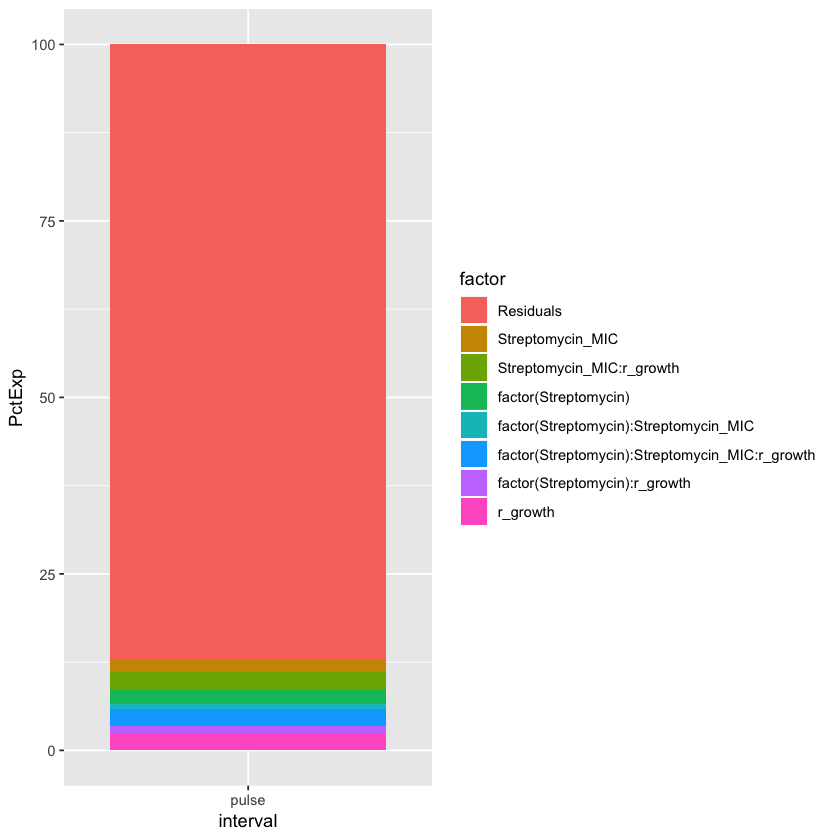

In [11]:
# proportions of variance explained

af = anova(M_pulse)
afss = af$"Sum Sq"
proportions_pulse = cbind(af,PctExp=afss/sum(afss)*100)
proportions_pulse$factor = rownames(proportions_pulse)
proportions_pulse$interval = "pulse"

# inspect

proportions_pulse

# together streptomycin level and traits explain 13 % of variance in competitive fitness during the antibiotic pulse

# visualize

ggplot(proportions_pulse, aes(interval, PctExp, fill = factor)) +
    geom_bar(stat = "identity")

Recovery phase

In [12]:
M_recovery = step(aov(selcoef ~ factor(Streptomycin) * Immigration * Streptomycin_MIC * r_growth, 
                   data = df2[df2$Interval == "recovery",]), trace=0)

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp,factor,interval
factor(Streptomycin),3,11.91275573,3.97091858,8.7771595,8.989452e-06,1.502536273,factor(Streptomycin),recovery
Immigration,1,1.33798852,1.33798852,2.9574363,8.567922e-02,0.168758290,Immigration,recovery
Streptomycin_MIC,1,13.38894955,13.38894955,29.5943982,6.163244e-08,1.688726170,Streptomycin_MIC,recovery
r_growth,1,12.72518663,12.72518663,28.1272432,1.296785e-07,1.605006845,r_growth,recovery
factor(Streptomycin):Immigration,3,2.46770705,0.82256902,1.8181736,1.418524e-01,0.311247829,factor(Streptomycin):Immigration,recovery
factor(Streptomycin):Streptomycin_MIC,3,10.74902807,3.58300936,7.9197405,3.042301e-05,1.355757219,factor(Streptomycin):Streptomycin_MIC,recovery
Immigration:Streptomycin_MIC,1,0.15119940,0.15119940,0.3342051,5.632758e-01,0.019070532,Immigration:Streptomycin_MIC,recovery
factor(Streptomycin):r_growth,3,2.37630078,0.79210026,1.7508267,1.546830e-01,0.299718906,factor(Streptomycin):r_growth,recovery
Immigration:r_growth,1,0.42521949,0.42521949,0.9398881,3.324550e-01,0.053632234,Immigration:r_growth,recovery
Streptomycin_MIC:r_growth,1,0.04408309,0.04408309,0.0974395,7.549654e-01,0.005560128,Streptomycin_MIC:r_growth,recovery


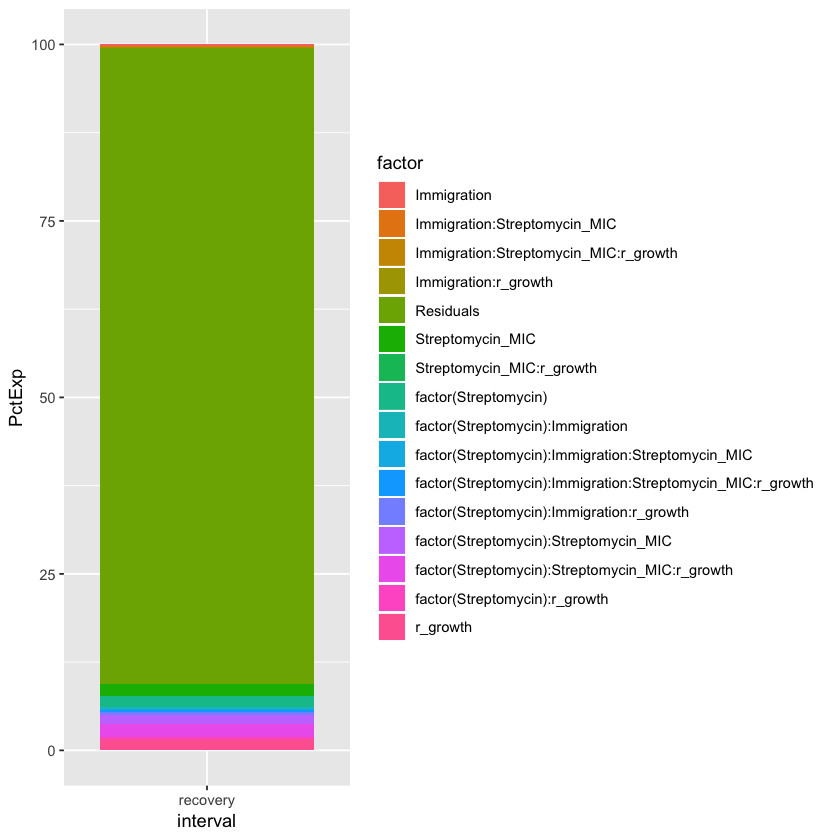

In [13]:
# proportions of variance explained

af = anova(M_recovery)
afss = af$"Sum Sq"
proportions_recovery = cbind(af,PctExp=afss/sum(afss)*100)
proportions_recovery$factor = rownames(proportions_recovery)
proportions_recovery$interval = "recovery"

# inspect

proportions_recovery

# together streptomycin level and traits explain 10 % of variance in competitive fitness 
# during the recovery phase

# visualize

ggplot(proportions_recovery, aes(interval, PctExp, fill = factor)) +
    geom_bar(stat = "identity")

**Merge and replot both pulse and immigration**

In [14]:
# concatenate < 1 % factors

proportions_pulse = rbind(proportions_pulse[proportions_pulse$PctExp >= 1,], 
                          c(0, 0, 0, 0, 0, sum(proportions_pulse$PctExp[proportions_pulse$PctExp < 1]), "others (< 1 %)", "pulse"))

proportions_recovery = rbind(proportions_recovery[proportions_recovery$PctExp >= 1,], 
                          c(0, 0, 0, 0, 0, sum(proportions_recovery$PctExp[proportions_recovery$PctExp < 1]), "others (< 1 %)", "recovery"))

In [15]:
proportions_variance = merge(proportions_pulse[,c("factor", "interval", "PctExp")], 
                             proportions_recovery[,c("factor", "interval", "PctExp")], 
                             all = T)

proportions_variance = proportions_variance[order(proportions_variance$PctExp, decreasing = T),]
factor_levels = unique(proportions_variance$factor)
proportions_variance$factor = factor(proportions_variance$factor, 
                                     levels = c(factor_levels[factor_levels != "others (< 1 %)"], "others (< 1 %)"))

proportions_variance$PctExp = as.numeric(as.character(proportions_variance$PctExp))

In [16]:
proportions_variance$factor = factor(proportions_variance$factor,
                                    levels = c('Residuals',
                                               'Streptomycin_MIC:r_growth',
                                               'factor(Streptomycin):Streptomycin_MIC:r_growth',
                                               'r_growth',
                                               'factor(Streptomycin)',
                                               'Streptomycin_MIC',
                                               'factor(Streptomycin):Streptomycin_MIC',
                                               'factor(Streptomycin):r_growth',
                                               'others (< 1 %)'),
                                    labels = c('Residuals',
                                               'Antibiotic MIC x growth rate',
                                               'Antibiotic level x antibiotic MIC x growth rate',
                                               'Growth rate',
                                               'Antibiotic level',
                                               'Antibiotic MIC',
                                               'Antibiotic level x antibiotic MIC',
                                               'Antibiotic level x growth rate',
                                               'Others (< 1 %)'))

**Visualize**

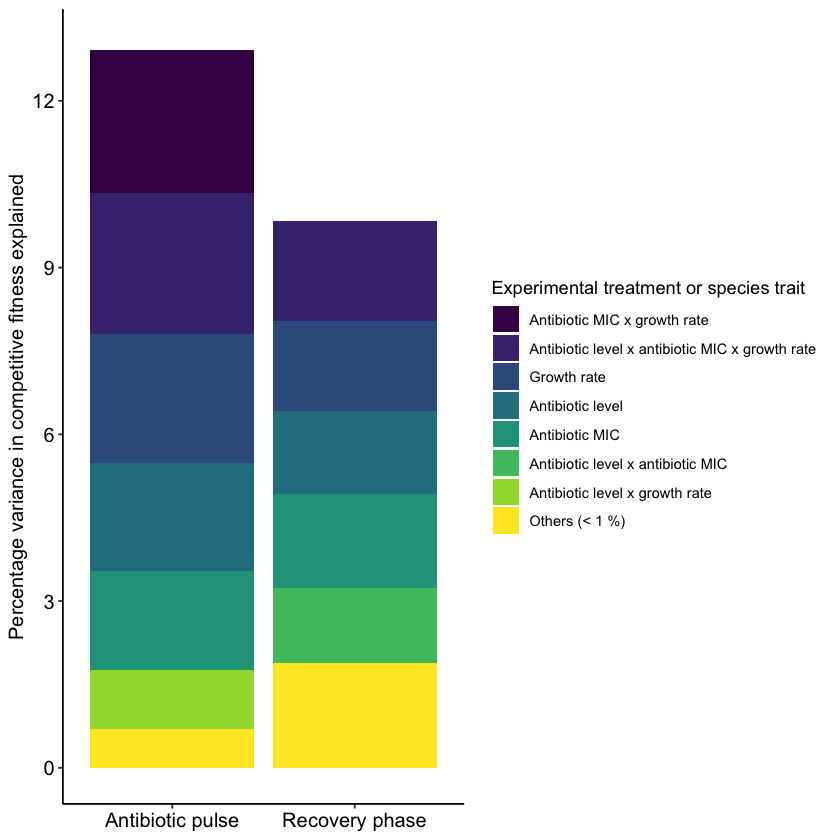

In [17]:
ggplot(proportions_variance[proportions_variance$factor != "Residuals",], aes(interval, PctExp, fill = factor)) +
    geom_bar(stat = "identity") +
    ylab("Percentage variance in competitive fitness explained") +
    scale_y_continuous(breaks = c(0, 3, 6, 9, 12), limits = c(0, 13)) +
    scale_x_discrete(labels = c("Antibiotic pulse", "Recovery phase"), ) +
    scale_fill_viridis(discrete = T) +
    labs(fill = "Experimental treatment or species trait") +
    theme_classic() +
    theme(axis.title.x = element_blank(),
          axis.text.x = element_text(size = 12, colour = "black"),
          axis.title.y = element_text(size = 12, colour = "black"),
          axis.text.y = element_text(size = 12, colour = "black"))

**Save plot**

In [18]:
# ggsave("../../../manuscript/figures/variance_partitioning_traits.pdf")

**Correlation heat map**

In [19]:
# preprocessing data frame

df2b = df2[,c("Species", "Replicate", "Streptomycin", "Immigration", "selcoef", "Interval")]
df2b = df2b[order(df2$Streptomycin),]
df2b$ID = paste(df2b$Streptomycin, df2b$Immigration, df2b$Interval, df2b$Replicate, sep = "_")
df2b = spread(df2b[,c("Species", "ID", "selcoef")], ID, selcoef)

df3 = as.matrix(t(df2b[,-1]))
colnames(df3) = df2b$Species

# remove missing data

df3[!complete.cases(df3),] # two samples
df3 = na.omit(df3)

,Acinetobacter_lwoffii_HAMBI_97,Aeromonas_caviae_HAMBI_1972,Agrobacterium_tumefaciens_HAMBI_105,Azorhizobium_caulinodans_HAMBI_216,Bordetella_avium_HAMBI_2160,Chitinophaga_filiformis_HAMBI_1966,Chitinophaga_sancti_HAMBI_1988,Citrobacter_koseri_HAMBI_1287,Comamonas_testosteroni_HAMBI_403,Cupriavidus_necator_HAMBI_2164,⋯,Paraburkholderia_caryophylli_HAMBI_2159,Paracoccus_denitrificans_HAMBI_2443,Pseudomonas_chlororaphis_HAMBI_1977,Pseudomonas_putida_HAMBI_6,Roseomonas_gilardii_HAMBI_2470,Sphingobacterium_multivorum_HAMBI_1874,Sphingobacterium_spiritivorum_HAMBI_1896,Sphingobium_yanoikuyae_HAMBI_1842,Stenotrophomonas_maltophilia_HAMBI_2659,Thermomonas_haemolytica_HAMBI_2467
128_1_recovery_6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
16_0_recovery_7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Extract metadata

In [20]:
meta = as.data.frame(rownames(df3))
colnames(meta) = "ID"

meta = meta %>% separate(ID, 
                c("Antibiotic", "Immigration", "Interval", "Replicate"))

meta$Immigration = factor(meta$Immigration, 
                         levels = c(0, 1),
                         labels = c("No immigration", "Immigration"))

meta$Interval = factor(meta$Interval, 
                         levels = c("pulse", "recovery"),
                         labels = c("Antibiotic pulse", "Recovery phase"))

head(meta)

Antibiotic,Immigration,Interval,Replicate
0,No immigration,Antibiotic pulse,1
0,No immigration,Antibiotic pulse,2
0,No immigration,Antibiotic pulse,3
0,No immigration,Antibiotic pulse,4
0,No immigration,Antibiotic pulse,5
0,No immigration,Antibiotic pulse,6


Reorder columns

In [21]:
df4 = cbind(meta, df3)
df4$Antibiotic = as.numeric(df4$Antibiotic)
df4 = df4[order(df4$Interval, df4$Antibiotic),]
df4$Antibiotic = factor(df4$Antibiotic, 
                        levels = c(0, 4, 16, 128),
                        labels = c("No", "Low", "Intermediate", "High"))

In [22]:
# compute correlation matrix

df5 = cor(t(df4[,-c(1:4)]), use = "pairwise.complete.obs", method = "pearson")
head(df5)

,0_0_pulse_1,0_0_pulse_2,0_0_pulse_3,0_0_pulse_4,0_0_pulse_5,0_0_pulse_6,0_0_pulse_7,0_0_pulse_8,0_1_pulse_1,0_1_pulse_2,⋯,128_0_recovery_6,128_0_recovery_7,128_0_recovery_8,128_1_recovery_1,128_1_recovery_2,128_1_recovery_3,128_1_recovery_4,128_1_recovery_5,128_1_recovery_7,128_1_recovery_8
0_0_pulse_1,1.0000000,0.5998272,0.5686056,0.1653811,0.2566381,0.5053588,0.19353465,0.3367031,0.2965461,0.1394799,⋯,0.1992487,-0.17481735,-0.06288396,-0.03654863,0.001544617,-0.035479837,-0.0654480971,0.01239667,-0.004381464,0.4021272
0_0_pulse_2,0.5998272,1.0000000,0.5614023,0.3011104,0.4089598,0.4633824,0.39815085,0.3337628,0.5805258,0.3193937,⋯,0.3530159,0.08912908,0.10802906,0.13261002,0.204984825,0.104405973,0.1746495934,0.20191178,0.295415675,0.3930930
0_0_pulse_3,0.5686056,0.5614023,1.0000000,0.3387198,0.3704586,0.2125539,0.11201054,0.3975639,0.3088812,0.1825370,⋯,0.2695095,-0.21400801,-0.16489107,-0.22480225,-0.142847108,-0.249679052,-0.0851130250,-0.02622088,-0.022067875,0.2876841
0_0_pulse_4,0.1653811,0.3011104,0.3387198,1.0000000,0.3015141,-0.1490293,0.01530133,0.2479871,0.1522857,0.1047846,⋯,-0.1524268,-0.05899640,0.06012412,0.21701589,-0.036383066,-0.004872712,-0.0002218342,0.07947355,0.125031832,-0.2535232
0_0_pulse_5,0.2566381,0.4089598,0.3704586,0.3015141,1.0000000,0.4216349,-0.19110634,0.1927679,0.1380200,0.1788633,⋯,0.3499026,-0.01770871,-0.17994815,0.11785899,0.132506565,0.075939040,-0.1201460455,0.01007067,0.002549712,0.1462655
0_0_pulse_6,0.5053588,0.4633824,0.2125539,-0.1490293,0.4216349,1.0000000,-0.10140455,0.2058624,0.2258464,0.1770329,⋯,0.1273275,0.22431170,0.26249780,0.18091246,0.443117473,0.198397747,0.3321247747,0.27457036,0.377259153,0.4024124


Create annotation for heat map

In [23]:
rownames(df5)

[1] "0_0_pulse_1"      "0_0_pulse_2"      "0_0_pulse_3"     
  [4] "0_0_pulse_4"      "0_0_pulse_5"      "0_0_pulse_6"     
  [7] "0_0_pulse_7"      "0_0_pulse_8"      "0_1_pulse_1"     
 [10] "0_1_pulse_2"      "0_1_pulse_3"      "0_1_pulse_4"     
 [13] "0_1_pulse_5"      "0_1_pulse_6"      "0_1_pulse_7"     
 [16] "0_1_pulse_8"      "4_0_pulse_1"      "4_0_pulse_2"     
 [19] "4_0_pulse_3"      "4_0_pulse_4"      "4_0_pulse_5"     
 [22] "4_0_pulse_6"      "4_0_pulse_7"      "4_0_pulse_8"     
 [25] "4_1_pulse_1"      "4_1_pulse_2"      "4_1_pulse_3"     
 [28] "4_1_pulse_4"      "4_1_pulse_5"      "4_1_pulse_6"     
 [31] "4_1_pulse_7"      "4_1_pulse_8"      "16_0_pulse_1"    
 [34] "16_0_pulse_2"     "16_0_pulse_3"     "16_0_pulse_4"    
 [37] "16_0_pulse_5"     "16_0_pulse_6"     "16_0_pulse_7"    
 [40] "16_0_pulse_8"     "16_1_pulse_1"     "16_1_pulse_2"    
 [43] "16_1_pulse_3"     "16_1_pulse_4"     "16_1_pulse_5"    
 [46] "16_1_pulse_6"     "16_1_pulse_7"     "16_1_pulse_8"    
 [49] "128_0_pulse_1"    "128_0_pulse_2"    "128_0_pulse_3"   
 [52] "128_0_pulse_4"    "128_0_pulse_5"    "128_0_pulse_6"   
 [55] "128_0_pulse_7"    "128_0_pulse_8"    "128_1_pulse_1"   
 [58] "128_1_pulse_2"    "128_1_pulse_3"    "128_1_pulse_4"   
 [61] "128_1_pulse_5"    "128_1_pulse_6"    "128_1_pulse_7"   
 [64] "128_1_pulse_8"    "0_0_recovery_1"   "0_0_recovery_2"  
 [67] "0_0_recovery_3"   "0_0_recovery_4"   "0_0_recovery_5"  
 [70] "0_0_recovery_6"   "0_0_recovery_7"   "0_0_recovery_8"  
 [73] "0_1_recovery_1"   "0_1_recovery_2"   "0_1_recovery_3"  
 [76] "0_1_recovery_4"   "0_1_recovery_5"   "0_1_recovery_6"  
 [79] "0_1_recovery_7"   "0_1_recovery_8"   "4_0_recovery_1"  
 [82] "4_0_recovery_2"   "4_0_recovery_3"   "4_0_recovery_4"  
 [85] "4_0_recovery_5"   "4_0_recovery_6"   "4_0_recovery_7"  
 [88] "4_0_recovery_8"   "4_1_recovery_1"   "4_1_recovery_2"  
 [91] "4_1_recovery_3"   "4_1_recovery_4"   "4_1_recovery_5"  
 [94] "4_1_recovery_6"   "4_1_recovery_7"   "4_1_recovery_8"  
 [97] "16_0_recovery_1"  "16_0_recovery_2"  "16_0_recovery_3" 
[100] "16_0_recovery_4"  "16_0_recovery_5"  "16_0_recovery_6" 
[103] "16_0_recovery_8"  "16_1_recovery_1"  "16_1_recovery_2" 
[106] "16_1_recovery_3"  "16_1_recovery_4"  "16_1_recovery_5" 
[109] "16_1_recovery_6"  "16_1_recovery_7"  "16_1_recovery_8" 
[112] "128_0_recovery_1" "128_0_recovery_2" "128_0_recovery_3"
[115] "128_0_recovery_4" "128_0_recovery_5" "128_0_recovery_6"
[118] "128_0_recovery_7" "128_0_recovery_8" "128_1_recovery_1"
[121] "128_1_recovery_2" "128_1_recovery_3" "128_1_recovery_4"
[124] "128_1_recovery_5" "128_1_recovery_7" "128_1_recovery_8"

In [24]:
annot_df = data.frame(Phase = df4$Interval, Antibiotic = df4$Antibiotic, Immigration = df4$Immigration)

# define colors for each levels of qualitative variables

col = list(Antibiotic = c("No" = "#D3D3D3", "Low" = "#cd6090", "Intermediate" = "#8f4364", "High" = "#522639"),
           Immigration = c("No immigration" = "yellow", "Immigration" = "orange"),
           Phase = c("Antibiotic pulse" = "black", "Recovery phase" = "darkgrey"))

# create heat map annotation

ha = HeatmapAnnotation(annot_df, 
                       col = col,
                       annotation_legend_param = list(title_gp = gpar(fontsize = 16),
                                                      labels_gp = gpar(fontsize = 16)))

Create heat map

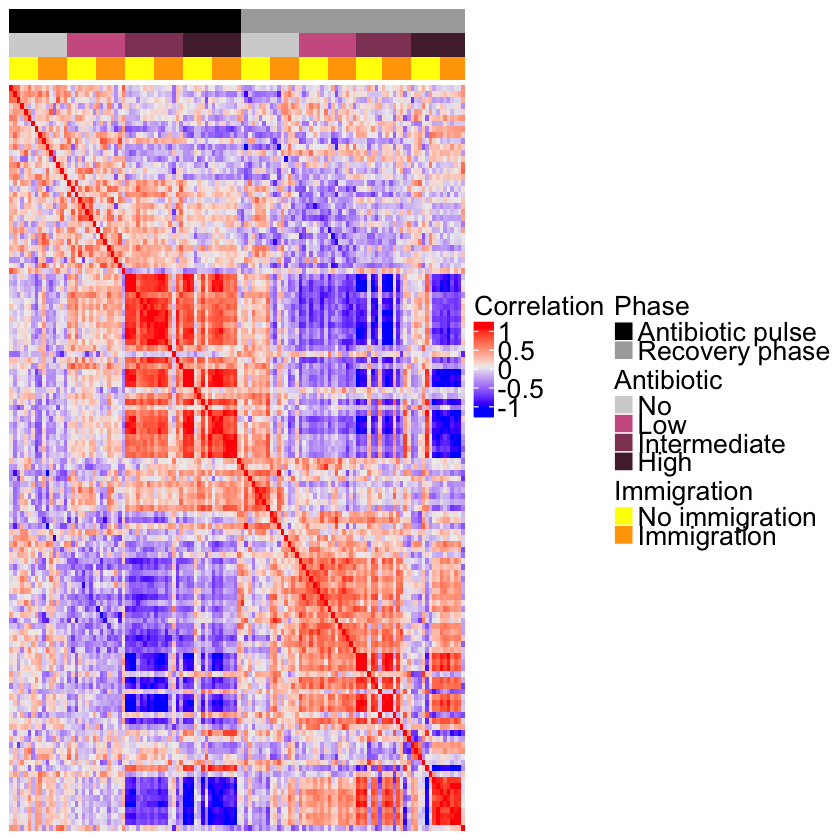

In [25]:
p2 = Heatmap(df5,
             name = "Correlation",
             cluster_rows = FALSE,
             cluster_columns = FALSE,
             top_annotation = ha,
             show_row_names = F,
             show_column_names = F,
             heatmap_legend_param = list(title_gp = gpar(fontsize = 16), 
                                         labels_gp = gpar(fontsize = 16)))
p2

**Save plot**

In [26]:
# pdf(file = "../../../manuscript/figures/comp_fitness_correlation.pdf", width = 13, height = 10)
# p2
# dev.off()

In [27]:
library(viridis)
palette = viridis_pal(option = "D")(5) 

,ID,Interval,Species,Replicate,Streptomycin,Immigration,ABUND16,ABUND32,ABUND48,selcoef,K_growth,r_growth,Streptomycin_MIC,Aminoglycoside_resistance_gene,Carbon_sources,selcoef_Ab,selcoef_norm
1857,16_0_1,pulse,Sphingobacterium multivorum,1,16,0,0.037567084,0.007751938,0.009998877,-1.578185e+00,0.37399655,0.5332055,5.257495,0,6,2.220446e-16,-1.57818537
1859,16_0_1,pulse,Stenotrophomonas maltophilia,1,16,0,0.007751938,0.007751938,0.007751938,2.220446e-16,0.08157468,0.8048875,3.871201,1,6,2.220446e-16,0.00000000
1861,16_0_1,pulse,Citrobacter koseri,1,16,0,0.203680041,0.519672371,0.222109875,9.366482e-01,0.38774476,0.6190797,3.178054,1,16,2.220446e-16,0.93664822
1862,16_0_1,pulse,Sphingobacterium spiritivorum,1,16,0,0.012011245,0.012627371,0.014043366,5.002348e-02,0.32457912,0.3520445,6.931472,0,16,2.220446e-16,0.05002348
1864,16_0_1,pulse,Niabella yanshanensis,1,16,0,0.007751938,0.007751938,0.007751938,2.220446e-16,0.33808208,0.2001869,1.791759,0,10,2.220446e-16,0.00000000
1865,16_0_1,pulse,Morganella morganii,1,16,0,0.016270551,0.007751938,0.007751938,-7.414139e-01,0.21548247,0.8490240,-1.660731,1,3,2.220446e-16,-0.74141392


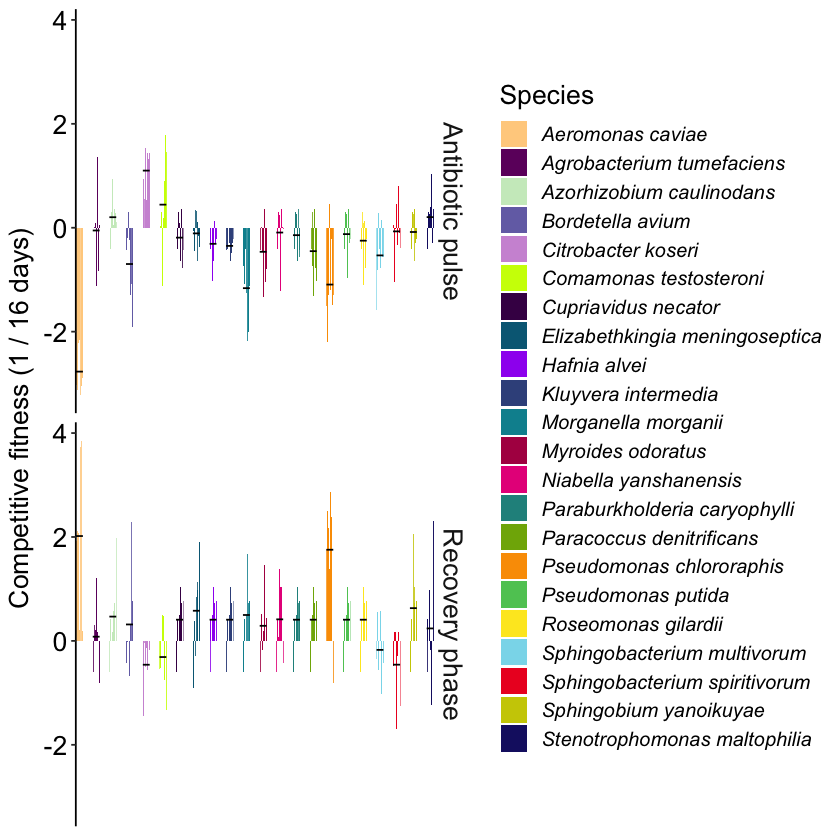

In [28]:
# New simplified figure

mypalette = c('Aeromonas caviae' = "#FFD08D",
              'Agrobacterium tumefaciens' = "#6E006C",
              'Azorhizobium caulinodans' = "#CCEBC5",
              #'Azospirillum brasilense' = "#5B5B5B", 
              'Bordetella avium' = "#7570B3",
              'Citrobacter koseri' = "#CF97D7",
              'Comamonas testosteroni' = "#CCFF00",
              'Cupriavidus necator' = palette[1],
              'Elizabethkingia meningoseptica' = "#006884",
              'Hafnia alvei' = "purple", 
              'Kluyvera intermedia' = palette[2], 
              'Morganella morganii' = "#00909E",
              'Myroides odoratus' = "#B00051",
              'Niabella yanshanensis' = "#E7298A",
              'Paraburkholderia caryophylli' = palette[3],
              'Paracoccus denitrificans' = "#7FB005",
              'Pseudomonas chlororaphis' = "#FA9D00",
              'Pseudomonas putida' = palette[4],
              'Roseomonas gilardii' = palette[5],
              'Sphingobacterium multivorum' = "#89DBEC",
              'Sphingobacterium spiritivorum' = "#ED0026",
              'Sphingobium yanoikuyae' = "#CCCC00",
              'Stenotrophomonas maltophilia' = "midnightblue")

df_sm16_im0 = df2[df2$Streptomycin == 16 & df2$Immigration == 0,]
df_sm16_im0$Species = gsub("_HAMBI.*", "", df_sm16_im0$Species)
df_sm16_im0$Species = gsub("Escherichia_coli_JE2571_RP4", "Escherichia_coli", df_sm16_im0$Species)
df_sm16_im0$Species = gsub("_", " ", df_sm16_im0$Species)
df_sm16_im0 = df_sm16_im0[!(df_sm16_im0$Species %in% c("Acinetobacter lwoffii", 
                                     "Chitinophaga sancti", 
                                     "Escherichia coli",
                                     "Moraxella canis",
                                                      "Chitinophaga filiformis",
                                                      "Thermomonas haemolytica")),]
head(df_sm16_im0)
df_sm16_im0$Species = factor(df_sm16_im0$Species, levels = sort(unique(as.character(df_sm16_im0$Species))))
df_sm16_im0$Replicate = factor(df_sm16_im0$Replicate, levels = c("1", "2", "3", "4", "5", "6", "7", "8"))
df_sm16_im0 = df_sm16_im0[!is.na(df_sm16_im0$selcoef_norm), ]
df_sm16_im0$Interval = factor(df_sm16_im0$Interval, levels = c("pulse", "recovery"),
                             labels = c("Antibiotic pulse", "Recovery phase"))

ggplot(df_sm16_im0, aes(Replicate, selcoef_norm, fill = Species)) +
    geom_bar(stat = "identity") +
    facet_grid(Interval ~ Species, switch = "x") +
    ylab("Competitive fitness (1 / 16 days)") +
    guides(fill=guide_legend(ncol=1)) +
    scale_fill_manual(values = c(mypalette)) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Aeromonas caviae" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -2.76911681), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Agrobacterium tumefaciens" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.05291844), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Azorhizobium caulinodans" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = 0.20256657), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Bordetella avium" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.69836075), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Citrobacter koseri" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = 1.09964430), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Comamonas testosteroni" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = 0.44451585), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Cupriavidus necator" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.19048436), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Elizabethkingia meningoseptica" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.10861872), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Hafnia alvei" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.30967902), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Kluyvera intermedia" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.34941811), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Morganella morganii" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -1.16290668), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Myroides odoratus" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.46282367), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Niabella yanshanensis" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.09224744), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Paraburkholderia caryophylli" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.14287188), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Paracoccus denitrificans" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.45076372), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Pseudomonas chlororaphis" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -1.09369634), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Pseudomonas putida" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.12272938), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Roseomonas gilardii" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.24904858), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Sphingobacterium multivorum" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.53230838), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Sphingobacterium spiritivorum" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.06995960), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Sphingobium yanoikuyae" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = -0.08191758), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Stenotrophomonas maltophilia" &
                                  df_sm16_im0$Interval == "Antibiotic pulse",], 
               aes(yintercept = 0.20428704), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Aeromonas caviae" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 2.01800461), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Agrobacterium tumefaciens" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.08093198), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Azorhizobium caulinodans" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.46753800), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Bordetella avium" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.31632659), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Citrobacter koseri" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = -0.45877861), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Comamonas testosteroni" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = -0.31090364), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Cupriavidus necator" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.40785702), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Elizabethkingia meningoseptica" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.58011321), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Hafnia alvei" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.40785702), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Kluyvera intermedia" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.40785702), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Morganella morganii" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.49847842), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Myroides odoratus" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.29024683), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Niabella yanshanensis" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.41469095), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Paraburkholderia caryophylli" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.40785702), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Paracoccus denitrificans" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.40785702), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Pseudomonas chlororaphis" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 1.75462036), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Pseudomonas putida" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.40785702), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Roseomonas gilardii" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.40785702), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Sphingobacterium multivorum" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = -0.17322215), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Sphingobacterium spiritivorum" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = -0.45760321), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Sphingobium yanoikuyae" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.63020156), linetype = 2) +
    geom_hline(data = df_sm16_im0[df_sm16_im0$Species == "Stenotrophomonas maltophilia" &
                                  df_sm16_im0$Interval == "Recovery phase",], 
               aes(yintercept = 0.23984561), linetype = 2) +
    theme_classic() +
    theme(#strip.text.x = element_text(angle = 90, hjust = 1, vjust = 1, face = "italic"),
          strip.text.y = element_text(size = 16),
          strip.text.x = element_blank(),
          strip.background = element_rect(colour="white", fill="white"),
          axis.ticks.x = element_blank(),
          axis.text.x = element_blank(),
          axis.title.x = element_blank(),
          axis.line.x = element_blank(), 
        axis.text.y = element_text(size = 16, color = "black"),
        axis.title.y = element_text(size = 16),
          legend.text = element_text(face = "italic", size = 12),
            legend.title = element_text(size = 16))

# ggsave("../../../manuscript/figures/full_ds/comp_fitness_sm16_im0.pdf", width = 12, height = 10)

In [29]:
aggregate(data = df_sm16_im0, selcoef_norm ~ Species + Interval, FUN = mean)

Species,Interval,selcoef_norm
Aeromonas caviae,Antibiotic pulse,-2.76911681
Agrobacterium tumefaciens,Antibiotic pulse,-0.05291844
Azorhizobium caulinodans,Antibiotic pulse,0.20256657
Bordetella avium,Antibiotic pulse,-0.69836075
Citrobacter koseri,Antibiotic pulse,1.09964430
Comamonas testosteroni,Antibiotic pulse,0.44451585
Cupriavidus necator,Antibiotic pulse,-0.19048436
Elizabethkingia meningoseptica,Antibiotic pulse,-0.10861872
Hafnia alvei,Antibiotic pulse,-0.30967902
Kluyvera intermedia,Antibiotic pulse,-0.34941811


In [30]:
# Bar plot for correlation within treatments

df6 = melt(df5)

# Remove diagonal from original correlation matrix (correlation of community with itself, always 1)

df6$same_id = ifelse(df6$Var1 == df6$Var2, "yes", "no")
df6 = df6[df6$same_id == "no",]
df6 = df6[,1:3]

# Remove cases where treatment differs (keep only correlation information between replicates within same treatment)

df6$treatment1 = gsub("pulse_.*", "pulse", df6$Var1)
df6$treatment1 = gsub("recovery_.*", "recovery", df6$treatment1)
df6$treatment2 = gsub("pulse_.*", "pulse", df6$Var2)
df6$treatment2 = gsub("recovery_.*", "recovery", df6$treatment2)
df6$same_treat = ifelse(df6$treatment1 == df6$treatment2, "yes", "no")
df6 = df6[df6$same_treat == "yes",]
df6 = df6[,1:5]

# Add treatment annotation

df6$Interval = ifelse(grepl("pulse", df6$treatment1), "pulse", "recovery")
df6$Immigration = ifelse(grepl("_0_", df6$treatment1), 0, 1)
df6$Antibiotic = ifelse(grepl("128_", df6$treatment1), "High", 
                       ifelse(grepl("16_", df6$treatment1), "Intermediate",
                       ifelse(grepl("4_", df6$treatment1), "Low", "No")))

# Inspect

head(df6)

# Aggregate

library(Rmisc)

df7 = summarySE(data = df6, measurevar = "value", groupvars = c("Interval", "Immigration", "Antibiotic"))
df7$Antibiotic = factor(df7$Antibiotic, levels = c("No", "Low", "Intermediate", "High"))
df7$Immigration = factor(df7$Immigration, levels = c(0, 1),
                        labels = c("No immigration", "Immigration"))
df7$Interval = factor(df7$Interval, levels = c("pulse", "recovery"),
                             labels = c("Antibiotic pulse", "Recovery phase"))

# Inspect

head(df7)

,Var1,Var2,value,treatment1,treatment2,Interval,Immigration,Antibiotic
2,0_0_pulse_2,0_0_pulse_1,0.5998272,0_0_pulse,0_0_pulse,pulse,0,No
3,0_0_pulse_3,0_0_pulse_1,0.5686056,0_0_pulse,0_0_pulse,pulse,0,No
4,0_0_pulse_4,0_0_pulse_1,0.1653811,0_0_pulse,0_0_pulse,pulse,0,No
5,0_0_pulse_5,0_0_pulse_1,0.2566381,0_0_pulse,0_0_pulse,pulse,0,No
6,0_0_pulse_6,0_0_pulse_1,0.5053588,0_0_pulse,0_0_pulse,pulse,0,No
7,0_0_pulse_7,0_0_pulse_1,0.1935346,0_0_pulse,0_0_pulse,pulse,0,No


Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact



Interval,Immigration,Antibiotic,N,value,sd,se,ci
Antibiotic pulse,No immigration,High,56,0.4482620,0.3147180,0.04205597,0.08428204
Antibiotic pulse,No immigration,Intermediate,56,0.7361563,0.1135214,0.01516993,0.03040123
Antibiotic pulse,No immigration,Low,56,0.2951205,0.2368730,0.03165349,0.06343501
Antibiotic pulse,No immigration,No,56,0.2692128,0.2056136,0.02747628,0.05506369
Antibiotic pulse,Immigration,High,56,0.5944947,0.2957186,0.03951707,0.07919397
Antibiotic pulse,Immigration,Intermediate,56,0.4438507,0.3455581,0.04617715,0.09254107


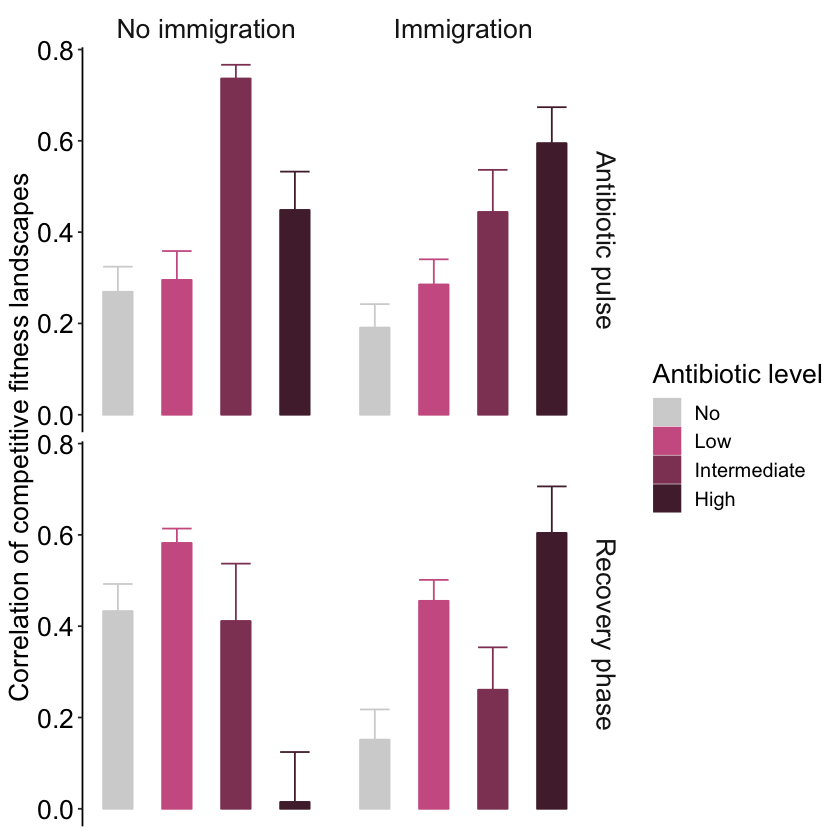

In [31]:
# Plot

ggplot(df7, aes(Antibiotic, value, fill = Antibiotic, color = Antibiotic)) +
    geom_bar(stat = "identity", width = 0.5) +
    geom_errorbar(aes(ymin = value, ymax = value + ci), width = 0.5) +
    scale_fill_manual(values = c("#D3D3D3", "#cd6090", "#8f4364", "#522639")) + 
    scale_color_manual(values = c("#D3D3D3", "#cd6090", "#8f4364", "#522639")) + 
    facet_grid(Interval ~ Immigration) +
    labs(fill = "Antibiotic level", color = "Antibiotic level") +
    ylab("Correlation of competitive fitness landscapes") +
    theme_classic() +
    theme(strip.text.y = element_text(size = 16),
          strip.text.x = element_text(size = 16),
          strip.background = element_rect(colour="white", fill="white"),
          axis.ticks.x = element_blank(),
          axis.text.x = element_blank(),
          axis.title.x = element_blank(),
          axis.line.x = element_blank(),
          axis.text.y = element_text(size = 16, color = "black"),
          axis.title.y = element_text(size = 16),
          legend.text = element_text(size = 12),
          legend.title = element_text(size = 16))

# ggsave("../../../manuscript/figures/comp_fitness_barplot.pdf", width = 6, height = 5)

**KL divergence**

In [32]:
library(philentropy)

**Read in data**

In [33]:
species_composition = read.table("../../../data/amplicon/rel_abund.txt", 
                                 sep = "\t",
                                 header = T,
                                 row.names = 1)

metadata = read.table("../../../data/amplicon/meta.txt",
                      sep = "\t",
                      header = T,
                      row.names = 1)

# inspect

head(species_composition)
head(metadata)

,Citrobacter_koseri_HAMBI_1287,Elizabethkingia_meningoseptica_HAMBI_1875,Aeromonas_caviae_HAMBI_1972,Pseudomonas_chlororaphis_HAMBI_1977,Sphingobacterium_spiritivorum_HAMBI_1896,Comamonas_testosteroni_HAMBI_403,Agrobacterium_tumefaciens_HAMBI_105,Stenotrophomonas_maltophilia_HAMBI_2659,Myroides_odoratus_HAMBI_1923,Morganella_morganii_HAMBI_1292,⋯,Roseomonas_gilardii_HAMBI_2470,Cupriavidus_necator_HAMBI_2164,Escherichia_coli_JE2571.RP4.,Paraburkholderia_caryophylli_HAMBI_2159,Chitinophaga_filiformis_HAMBI_1966,Thermomonas_haemolytica_HAMBI_2467,Moraxella_canis_HAMBI_2792,Acinetobacter_lwoffii_HAMBI_97,Pseudomonas_putida_HAMBI_6,Chitinophaga_sancti_HAMBI_1988
T12_I0_AB0_REP1,0.02044547,0.1950614,0.2713066,0.1746159,0.002609835,0.3269056022,5.283067e-05,0.00000000,0.0000000000,2.113227e-05,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP2,0.18956445,0.3435331,0.1276586,0.3231926,0.003979660,0.0002653106,8.843688e-05,0.00000000,0.0000000000,3.537475e-04,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP3,0.15960167,0.2744808,0.1932894,0.2805813,0.087605975,0.0000000000,0.000000e+00,0.00000000,0.0006279998,0.000000e+00,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP4,0.16116394,0.3383399,0.1873889,0.1478108,0.081355907,0.0047695225,6.591421e-03,0.00000000,0.0109758265,7.924517e-04,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP5,0.17480631,0.2856506,0.2308473,0.1852274,0.017277655,0.0133419144,5.990247e-03,0.04039704,0.0019802470,1.732716e-03,⋯,0,0.0003465432,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP6,0.24414392,0.2605325,0.2364341,0.1691945,0.018537243,0.0043815302,1.365015e-02,0.00000000,0.0129760701,3.875969e-03,⋯,0,0.0000000000,0,0,0,0,0,0,0.0001263903,0


,Immigration,Streptomycin,Replicate,Day
T12_I0_AB0_REP1,0,0,1,48
T12_I0_AB0_REP2,0,0,2,48
T12_I0_AB0_REP3,0,0,3,48
T12_I0_AB0_REP4,0,0,4,48
T12_I0_AB0_REP5,0,0,5,48
T12_I0_AB0_REP6,0,0,6,48


Reorder columns

In [34]:
df5 = cbind(metadata, species_composition)
df5$Streptomycin = as.numeric(df5$Streptomycin)
df5 = df5[order(df5$Day, df5$Streptomycin),]
df5$Streptomycin = factor(df5$Streptomycin, 
                        levels = c(0, 4, 16, 128))

Create KL distance matrix for all communities

In [35]:
KL = KL(as.matrix(df5[,-c(1:4)]))
rownames(KL) = rownames(species_composition)
colnames(KL) = rownames(species_composition)

# inspect

head(KL)

Metric: 'kullback-leibler' using unit: 'log2'; comparing: 190 vectors.


,T12_I0_AB0_REP1,T12_I0_AB0_REP2,T12_I0_AB0_REP3,T12_I0_AB0_REP4,T12_I0_AB0_REP5,T12_I0_AB0_REP6,T12_I0_AB0_REP7,T12_I0_AB0_REP8,T12_I0_AB128_REP1,T12_I0_AB128_REP2,⋯,T8_I1_AB16_REP7,T8_I1_AB16_REP8,T8_I1_AB4_REP1,T8_I1_AB4_REP2,T8_I1_AB4_REP3,T8_I1_AB4_REP4,T8_I1_AB4_REP5,T8_I1_AB4_REP6,T8_I1_AB4_REP7,T8_I1_AB4_REP8
T12_I0_AB0_REP1,0.0000000,0.1742590,0.2119473,0.4690244,0.3853242,0.3178711,0.4230072,0.3189254,1.3969651,1.1581701,⋯,4.382657,0.4769348,0.3427294,1.1225080,1.1334818,0.5056406,0.5360117,0.5954301,0.6607188,0.4982556
T12_I0_AB0_REP2,0.1742590,0.0000000,0.1378547,0.5766703,0.5143191,0.4240141,0.4650926,0.3504272,0.6794916,0.5822907,⋯,4.251378,0.4546043,0.3043167,0.5057484,0.4954328,0.2109653,0.4532022,0.4218879,0.4990183,0.4238248
T12_I0_AB0_REP3,0.2119473,0.1378547,0.0000000,0.6369719,0.7001591,0.5532366,0.6320777,0.5726020,0.7589462,0.6677725,⋯,4.153113,0.5045348,0.4966502,0.5242302,0.5526137,0.3279944,0.6698457,0.5274873,0.6584673,0.4113283
T12_I0_AB0_REP4,0.4690244,0.5766703,0.6369719,0.0000000,0.6660842,0.3598600,0.5468943,0.3508915,2.8753013,2.7774916,⋯,5.073051,1.3803747,1.0028874,1.8944836,2.0591708,1.6782748,0.5052406,1.0151431,0.6778795,0.4637137
T12_I0_AB0_REP5,0.3853242,0.5143191,0.7001591,0.6660842,0.0000000,0.1886391,0.3013778,1.5166881,3.3073199,3.2550244,⋯,4.776964,1.9156828,1.8152725,2.5782510,2.7697652,2.1211972,1.8678007,2.0854767,1.9682673,1.8611673
T12_I0_AB0_REP6,0.3178711,0.4240141,0.5532366,0.3598600,0.1886391,0.0000000,0.1561372,0.4269634,2.6970004,2.6951338,⋯,4.549771,0.9601302,0.8659662,1.6512960,1.8772477,1.2638578,0.6938459,1.0831784,0.7747737,0.7155162


Edit treatment information before creating annotation for upcoming heat map

In [36]:
df5$Day = ifelse(df5$Day == 16, "Before pulse", 
                            ifelse(df5$Day == 32, "Antibiotic pulse", "Recovery phase"))

df5$Streptomycin = ifelse(df5$Streptomycin == 0, "No",
                              ifelse(df5$Streptomycin == 4, "Low",
                                    ifelse(df5$Streptomycin == 16, "Intermediate", "High")))

df5$Immigration = ifelse(df5$Immigration == 0, "No immigration", "Immigration")

Create annotation for heat map

In [37]:
annot_df2 = data.frame(Antibiotic = df5$Streptomycin, Immigration = df5$Immigration, Phase = df5$Day)

# define colors for each levels of qualitative variables

col2 = list(Antibiotic = c("No" = "#D3D3D3", "Low" = "#cd6090", "Intermediate" = "#8f4364", "High" = "#522639"),
           Immigration = c("No immigration" = "yellow", "Immigration" = "orange"),
           Phase = c("Before pulse" = "lightgrey", "Antibiotic pulse" = "black", "Recovery phase" = "darkgrey"))

# create heat map annotation

ha2 = HeatmapAnnotation(annot_df2, 
                       col = col2,
                       annotation_legend_param = list(title_gp = gpar(fontsize = 16),
                                                      labels_gp = gpar(fontsize = 16)))

Create heat map

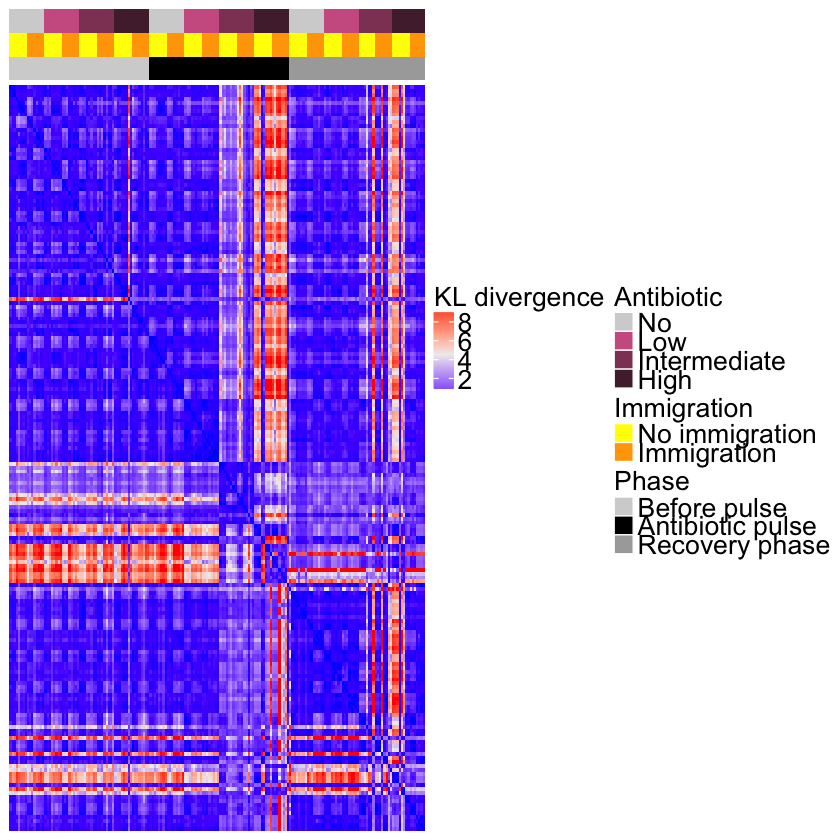

In [38]:
p3 = Heatmap(KL,
             name = "KL divergence",
             cluster_rows = FALSE,
             cluster_columns = FALSE,
             top_annotation = ha2,
             show_row_names = F,
             show_column_names = F,
             heatmap_legend_param = list(title_gp = gpar(fontsize = 16), 
                                         labels_gp = gpar(fontsize = 16)))
p3

**Save plot**

In [39]:
# pdf(file = "../../../manuscript/figures/KL_divergence.pdf", width = 13, height = 10)
# p3
# dev.off()